# Primeiros passos

In [10]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [12]:
#Link do site
site = 'https://www.google.com/search?q=americanas&sxsrf=AJOqlzVr27HiGRCW6tYcp3AXDAoxfICfSA:1676140758681&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiN4470jo79AhW7pZUCHUEqA_4Q_AUoBHoECAEQBg&biw=683&bih=656&dpr=1'

#Requisição
pagina = requests.get(site)

In [20]:
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [16]:
#Retorna o nome da página
coleta.title.string

'americanas - Google Search'

In [17]:
#Retorna o tipo
coleta.title.name

'title'

In [31]:
#Retorna a quantidade de imagens na página
len(coleta.find_all('img'))

9

# Solução

In [40]:
def buscar_empresas(ticket):
  
  #Criando a URL
  url = f'https://news.google.com/search?q={ticket}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  #Resposta
  resposta = requests.get(url)

  #código - soup
  codigo_html = resposta.text
  
  #converter - soup
  objeto_soup = BeautifulSoup(codigo_html,'html.parser')

  return objeto_soup

In [64]:
#Todas as informações
dados = buscar_empresas('itaú')

len(dados)

#Buscando os títulos
elementos = dados.find_all('h3')

In [65]:
#Buscando os textos
noticias = [texto.get_text() for texto in elementos]
print('noticias')
print(len(noticias))

noticias
91


In [66]:
print('***' * 7)
print('Notícias localizadas')
print('***' * 7)

for numero, loop in enumerate(noticias[0:5]):
  print('--' * 10)
  print(loop)

*********************
Notícias localizadas
*********************
--------------------
Novo golpe do Pix usa extrato de clientes e toca até música do Itaú
--------------------
Criminosos acessam extrato de cliente do Itaú para aplicar golpe por ligação
--------------------
Golpe simula atendimento do Itaú e usa até dados reais da conta bancária
--------------------
Itaú isola caso Americanas, alivia mercado e ações disparam
--------------------
Americanas revisa dívida com grandes bancos de R$ 13,1 bi para R$ 15,2 bi


In [67]:
concatenar = ''

for loop in noticias:
  quebra = loop.split()

  for palavra in quebra:
    concatenar = concatenar + ' ' + palavra


In [68]:
concatenar

' Novo golpe do Pix usa extrato de clientes e toca até música do Itaú Criminosos acessam extrato de cliente do Itaú para aplicar golpe por ligação Golpe simula atendimento do Itaú e usa até dados reais da conta bancária Itaú isola caso Americanas, alivia mercado e ações disparam Americanas revisa dívida com grandes bancos de R$ 13,1 bi para R$ 15,2 bi Itaú (ITUB4): apesar do resultado em linha com a expectativa, o banco \'perdeu\' R$ 1,3 bilhão com o \'efeito Americanas ... Bradesco (BBDC4), Itaú (ITUB4), Santander (SANB11): bancos fecham 2022 com lucro de R$ 64,3 bi Itaú pagará segunda parcela da PLR no dia 1º de março Mario Mesquita, economista-chefe do Itaú (ITUB4), defende meta de inflação e cobra definição do governo Itaú libera cartão de crédito sem versão física para todos os correntistas Itaú confirma que o cartão Personnalité LATAM Pass Visa Infinite segue disponível para solicitação pelos canais digitais Click Digital Mastercard chega para todos os correntistas do Itaú O pont

In [90]:
# from PIL import Image
# mascara = np.array(Image.open('itau-logo-1.png'))
# mascara[0:10]

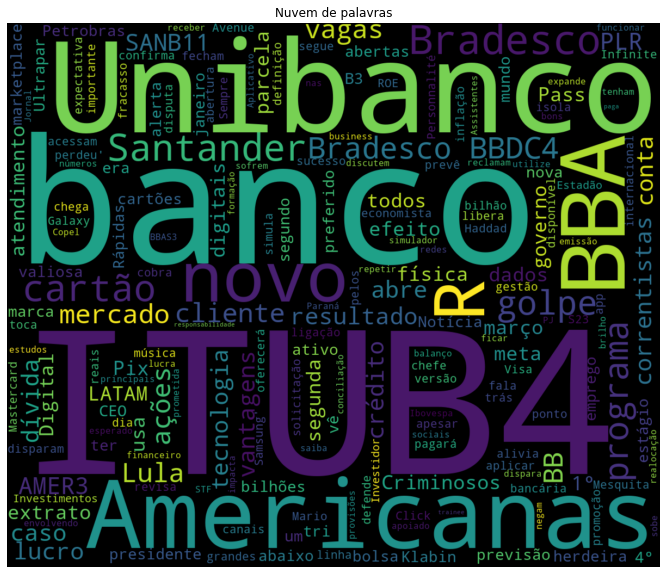

In [92]:
#Criando nuvem de palavras

nuvem_palavras = WordCloud(width = 1200, 
                           height = 1000,
                           stopwords = ['as', 'diz', 'devem', 'fazem', 'veja', 'só', 'quanto', 'a', 'uma', 'não', 'sem', 'vai', 'é', 'quais', 'bi', 'estão', 'entre', 'até', 'mais', 'como', 'se', 'no', 'dos', 'está', 'tem', 'pode', 'os', 'por', 'após', 'com', 'do', 'e', 'de', 'itaú', 'na', 'sobre', 'da', 'o', 'em', 'para', 'que', 'pela', 'pelo']).generate(concatenar)

figura, eixo = plt.subplots(figsize = (12, 10))
plt.title('Nuvem de palavras')
eixo.imshow(nuvem_palavras, interpolation = 'bilinear')
eixo.set_axis_off()
plt.savefig('analise_nuvem.png')